In [1]:
import numpy as np
from ModelWrapper import check_answer
import matplotlib.pyplot as plt

In [2]:
def forward(w, x):
    '''
    @param w: weights of our neural net model
    @param x: input data
    
    @return y: prediction calculated
    '''
    y = w * x
    return y

In [3]:
# Verify correctness of forward(w, x)

x = np.array([0.10298026, 0.41655058, 0.48560227, 0.60588507, 0.8701086,
           0.63899074, 0.32650349, 0.66185029, 0.43323724, 0.95059843])
w = 0.83106743

correct_answer = np.array([0.08558354, 0.34618162, 0.40356823, 0.50353135, 0.72311892,
                           0.53104439, 0.27134642, 0.55004222, 0.36004936, 0.79001139])

check_answer(correct_answer, forward(w, x))


Difference between correct answer and your solution is 4.390742303453521e-18
Passed!


In [4]:
def compute_loss(prediction, ground_truth):
    '''
    @param prediction: prediction our model made
    @param ground_truth: the real value corresponding to input data
    
    @return loss: the Mean Squared Error between prediction and ground_truth
    '''
    loss = np.mean((prediction - ground_truth) ** 2)
    return loss

In [5]:
# Verify correctness of compute_loss(prediction, ground_truth)

prediction = np.array([0.08558354, 0.34618162, 0.40356823, 0.50353135, 0.72311892,
                       0.53104439, 0.27134642, 0.55004222, 0.36004936, 0.79001139])

ground_truth = np.array([0.64265615, 0.38801768, 0.95016593, 0.824352  , 0.44688882,
                         0.36782865, 0.90771466, 0.74559116, 0.52141405, 0.84289056])

correct_answer = 0.12887562243845122
check_answer(correct_answer, compute_loss(prediction, ground_truth))


Difference between correct answer and your solution is 0.0
Passed!


In [6]:
def backward(w, x, ground_truth, loss):
    '''
    @param w: weights of our neural net model
    @param x: input data
    @param ground_truth: the real value corresponding to input data
    @param loss: the Mean Squared Error between prediction and ground_truth
    
    @return gradient: (dl/dw) gradient of MSE loss against w
    '''
    gradient = np.mean(2*x*(x*w - ground_truth))
    return gradient

In [8]:
# Verify correctness of backward(w, x, ground_truth, loss)

x = np.array([0.10298026, 0.41655058, 0.48560227, 0.60588507, 0.8701086,
           0.63899074, 0.32650349, 0.66185029, 0.43323724, 0.95059843])
w = 0.83106743

ground_truth = np.array([0.64265615, 0.38801768, 0.95016593, 0.824352  , 0.44688882,
                         0.36782865, 0.90771466, 0.74559116, 0.52141405, 0.84289056])

correct_answer = -0.12946738659087742
check_answer(correct_answer, backward(w, x, ground_truth, compute_loss(prediction, ground_truth)))

Difference between correct answer and your solution is 0.0
Passed!


In [9]:
def gradient_descent_step(w, gradient, learning_rate):
    '''
    @param w: weights of our neural net model
    @param gradient: (dl/dw) gradient of MSE loss against w
    @param learning_rate: learning rate for gradient descent algorithm
    
    @return updated_w: new weights for our model after taking one gradient descent step
    '''
    updated_w = w - learning_rate * gradient
    return updated_w

In [10]:
# Verify correctness of gradient_descent_step(w, graident, learning_rate)

w = 0.83106743
gradient = -0.12946738659087742
learning_rate = 1e-4

correct_answer = 0.8310803767386591
check_answer(correct_answer, gradient_descent_step(w, gradient, learning_rate))

Difference between correct answer and your solution is 0.0
Passed!


# Toy Example: Gravity of Mars

NASA recently landed a rover on Mars! To emperically measure the gravity of Mars, NASA sent the rover with 100 objects of known mass(measured on Earth with gravity of Earth). The rover was able to measure the amount of gravitational forces experienced by each of these 100 objects. Help NASA find the gravity of Mars using gradient descent!

In [11]:
# Data collected
gravitational_forces_measured = np.array([74.33922471, 18.89621021, 30.58944369, 87.37739668, 60.4725419 ,
       57.6803083 , 56.2648722 , 93.00173316, 42.709132  , 41.79055808,
       80.04357277, 71.69702041, 57.35612417, 45.43189827, 58.20043038,
       64.31022133, 28.42197906, 42.53010491, 85.1058512 , 38.93001604,
       49.52833613, 33.22718541, 91.75993885, 56.21887701, 80.93994588,
       48.01562877, 18.9732248 , 57.74769716, 45.84018553, 91.60806876,
       19.70652165, 37.60727816, 45.61403876, 69.8887408 , 52.77067505,
       44.82916722, 18.85670526, 86.9777561 , 56.82597148, 65.92260198,
       71.53819987, 64.0595462 , 22.58504336, 48.96056478, 28.25736909,
       21.70609598, 38.96906147, 30.87682747, 76.77237865, 67.3654563 ])
mass_known = np.array([19.97829966,  5.07833211,  8.22078435, 23.48221443, 16.25162994,
       15.50120738, 15.1208723 , 24.9937833 , 11.47791295, 11.23109415,
       21.51129403, 19.26826622, 15.4140919 , 12.20962345, 15.64103563,
       17.28298684,  7.63826191, 11.42969585, 22.87174834, 10.46217718,
       13.3105441 ,  8.9295792 , 24.66007791, 15.10851944, 21.75213904,
       12.90390673,  5.09905799, 15.51950094, 12.31934303, 24.6191229 ,
        5.29592859, 10.10680612, 12.25849186, 18.78223016, 14.18179067,
       12.04753032,  5.0676313 , 23.37479313, 15.27177695, 17.71636206,
       19.22556517, 17.21566366,  6.06971178, 13.15797054,  7.59393684,
        5.83347426, 10.47273137,  8.29789311, 20.63209229, 18.10405342])

Gravity of Mars found: 3.721002972221443


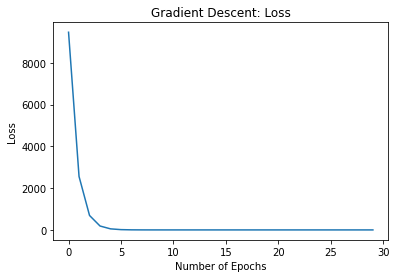

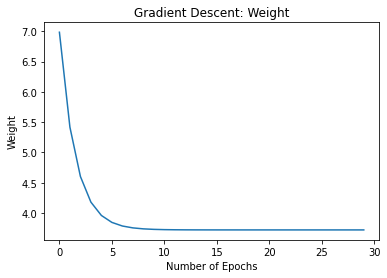

In [12]:
# Hint: gravitational_forces_measured = gravity_of_mars * mass_known


w = 10 # initial w
learning_rate = 1e-3
num_epochs = 30

loss_trajectory = []
w_trajectory = []

for _ in range(num_epochs):
    prediction = forward(w, mass_known)            # TODO: Use our current model to predict
    loss = compute_loss(prediction, gravitational_forces_measured)        # TODO: Compute the loss between our prediction and the ground truth
    gradient = backward(w, mass_known, gravitational_forces_measured, loss)                       # TODO: Compute gradients for our model parameters
    w = gradient_descent_step(w, gradient, learning_rate)                # TODO: Update our model parameters with the computed gradients
    loss_trajectory.append(loss)
    w_trajectory.append(w)

plt.title("Gradient Descent: Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.plot(loss_trajectory)

plt.figure()
plt.title("Gradient Descent: Weight")
plt.xlabel("Number of Epochs")
plt.ylabel("Weight")
plt.plot(w_trajectory)

print(f"Gravity of Mars found: {w}")
